<a href="https://colab.research.google.com/github/soma2000-lang/Transformers/blob/main/Summarising_using_You_tube_trnscript_api.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q transformers

     |████████████████████████████████| 2.1MB 5.5MB/s 
     |████████████████████████████████| 870kB 17.8MB/s 
     |████████████████████████████████| 3.3MB 18.8MB/s 


In [2]:
!pip install -q youtube_transcript_api

In [4]:
from transformers import pipeline
from youtube_transcript_api import YouTubeTranscriptApi

In [6]:
youtube_video = "https://www.youtube.com/watch?v=aOL7wzEIZSc"

In [7]:
video_id = youtube_video.split("=")[1]

In [8]:
video_id

'aOL7wzEIZSc'

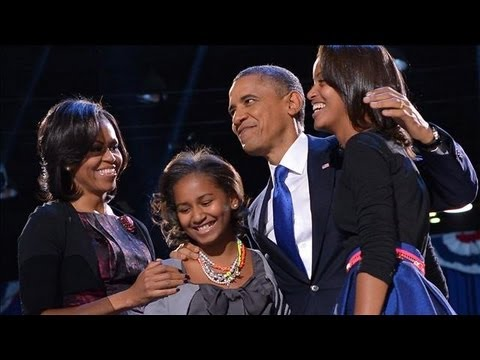

In [9]:
from IPython.display import YouTubeVideo
YouTubeVideo(video_id)

In [10]:
YouTubeTranscriptApi.get_transcript(video_id)
transcript = YouTubeTranscriptApi.get_transcript(video_id)

In [11]:
transcript[0:5]

[{'duration': 4.559, 'start': 1.87, 'text': '[Music]'},
 {'duration': 9.031,
  'start': 13.769,
  'text': 'tonight more than 200 years after a'},
 {'duration': 5.09,
  'start': 19.77,
  'text': 'former colony won the right to determine'},
 {'duration': 6.54, 'start': 22.8, 'text': 'its own destiny'},
 {'duration': 15.78,
  'start': 24.86,
  'text': 'the task of perfecting our union moves'}]

In [12]:

result = ""
for i in transcript:
    result += ' ' + i['text']
#print(result)
print(len(result))

11353


In [13]:
summarizer = pipeline('summarization')

In [14]:
num_iters = int(len(result)/1000)
summarized_text = []
for i in range(0, num_iters + 1):
  start = 0
  start = i * 1000
  end = (i + 1) * 1000
  out = summarizer(result[start:end])
  out = out[0]
  out = out['summary_text']
  summarized_text.append(out)

print(summarized_text)

Your max_length is set to 142, but you input_length is only 71. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)


[' I want to thank every American who participated in this election whether you voted for the very first time or weighted it in wine for a very long time . We are an American family and we rise or fall together as one nation and as one people tonight . We know in our hearts but for the United States of America the best is yet to come .', ' President Obama congratulates Mitt Romney and Paul Ryan on a hard-fought campaign . Michelle Obama says she has never been prouder to Michelle Obama . Biden says he has never loved Michelle Obama more than he has loved her . Biden: "I wouldn\'t be the man I am today without the woman who agreed to marry me 20 years ago"', " The president says he is proud of his campaign team and volunteers in the history of politics the best the best ever . He says he will always be grateful for everything that you've done and all the incredible work that you put in . 'I know that political campaigns can sometimes seem small even silly and that provides plenty of fod

In [15]:
len(str(summarized_text))

4372

In [16]:
str(summarized_text)

'[\' I want to thank every American who participated in this election whether you voted for the very first time or weighted it in wine for a very long time . We are an American family and we rise or fall together as one nation and as one people tonight . We know in our hearts but for the United States of America the best is yet to come .\', \' President Obama congratulates Mitt Romney and Paul Ryan on a hard-fought campaign . Michelle Obama says she has never been prouder to Michelle Obama . Biden says he has never loved Michelle Obama more than he has loved her . Biden: "I wouldn\\\'t be the man I am today without the woman who agreed to marry me 20 years ago"\', " The president says he is proud of his campaign team and volunteers in the history of politics the best the best ever . He says he will always be grateful for everything that you\'ve done and all the incredible work that you put in . \'I know that political campaigns can sometimes seem small even silly and that provides plen